In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import pearsonr

In [ ]:
df = pd.read_excel('IMDB_movies_cleaner.xlsx')
df.head()

,Series_Title,Released_Year,Runtime,Genre,Genre2,Genre3,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Year,Annual Average CPI(-U)
0,Star Wars: Episode VII - The Force Awakens,2015,138 min,Action,Adventure,Sci-Fi,7.9,80,J.J. Abrams,860823,936662225,1925.0,17.5
1,Avengers: Endgame,2019,181 min,Action,Adventure,Drama,8.4,78,Anthony Russo,809955,858373000,1926.0,17.7
2,Avatar,2009,162 min,Action,Adventure,Fantasy,7.8,83,James Cameron,1118998,760507625,1927.0,17.4
3,Avengers: Infinity War,2018,149 min,Action,Adventure,Sci-Fi,8.4,68,Anthony Russo,834477,678815482,1928.0,17.2
4,Titanic,1997,194 min,Drama,Romance,NaN,7.8,75,James Cameron,1046089,659325379,1929.0,17.2


In [ ]:
dir_count = df.value_counts('Director')
print(np.where(dir_count >= 6))
major_dirs = dir_count[0:15]
print(dir_count[0:15])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),)
Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Quentin Tarantino     8
Christopher Nolan     8
David Fincher         8
Clint Eastwood        8
Rob Reiner            7
Hayao Miyazaki        7
Woody Allen           7
Wes Anderson          6
Richard Linklater     6
Ridley Scott          6
Joel Coen             6
Stanley Kubrick       6
dtype: int64


In [ ]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = df['Runtime'].astype(int)
df

,Series_Title,Released_Year,Runtime,Genre,Genre2,Genre3,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Year,Annual Average CPI(-U)
0,Star Wars: Episode VII - The Force Awakens,2015,138,Action,Adventure,Sci-Fi,7.9,80,J.J. Abrams,860823,936662225,1925.0,17.5
1,Avengers: Endgame,2019,181,Action,Adventure,Drama,8.4,78,Anthony Russo,809955,858373000,1926.0,17.7
2,Avatar,2009,162,Action,Adventure,Fantasy,7.8,83,James Cameron,1118998,760507625,1927.0,17.4
3,Avengers: Infinity War,2018,149,Action,Adventure,Sci-Fi,8.4,68,Anthony Russo,834477,678815482,1928.0,17.2
4,Titanic,1997,194,Drama,Romance,NaN,7.8,75,James Cameron,1046089,659325379,1929.0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,All About Eve,1950,138,Drama,NaN,NaN,8.2,98,Joseph L. Mankiewicz,120539,10177,NaN,NaN
746,Tropa de Elite,2007,115,Action,Crime,Drama,8.0,33,JosÃ© Padilha,98097,8060,NaN,NaN
747,Dead Man's Shoes,2004,90,Crime,Drama,Thriller,7.6,52,Shane Meadows,49728,6013,NaN,NaN
748,Mr. Nobody,2009,141,Drama,Fantasy,Romance,7.8,63,Jaco Van Dormael,216421,3600,NaN,NaN


In [ ]:
adjuster = pd.DataFrame(df, columns = ['Year', 'Annual Average CPI(-U)'])
adjuster['Annual Average CPI(-U)'] /= 100
adjuster
new_df = df.merge(adjuster, left_on = 'Released_Year', right_on = 'Year', how = "left")
new_df

,Series_Title,Released_Year,Runtime,Genre,Genre2,Genre3,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Year_x,Annual Average CPI(-U)_x,Year_y,Annual Average CPI(-U)_y
0,Star Wars: Episode VII - The Force Awakens,2015,138,Action,Adventure,Sci-Fi,7.9,80,J.J. Abrams,860823,936662225,1925.0,17.5,2015.0,2.370
1,Avengers: Endgame,2019,181,Action,Adventure,Drama,8.4,78,Anthony Russo,809955,858373000,1926.0,17.7,2019.0,2.557
2,Avatar,2009,162,Action,Adventure,Fantasy,7.8,83,James Cameron,1118998,760507625,1927.0,17.4,2009.0,2.145
3,Avengers: Infinity War,2018,149,Action,Adventure,Sci-Fi,8.4,68,Anthony Russo,834477,678815482,1928.0,17.2,2018.0,2.511
4,Titanic,1997,194,Drama,Romance,NaN,7.8,75,James Cameron,1046089,659325379,1929.0,17.2,1997.0,1.605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,All About Eve,1950,138,Drama,NaN,NaN,8.2,98,Joseph L. Mankiewicz,120539,10177,NaN,NaN,1950.0,0.241
746,Tropa de Elite,2007,115,Action,Crime,Drama,8.0,33,JosÃ© Padilha,98097,8060,NaN,NaN,2007.0,2.073
747,Dead Man's Shoes,2004,90,Crime,Drama,Thriller,7.6,52,Shane Meadows,49728,6013,NaN,NaN,2004.0,1.889
748,Mr. Nobody,2009,141,Drama,Fantasy,Romance,7.8,63,Jaco Van Dormael,216421,3600,NaN,NaN,2009.0,2.145


In [ ]:
new_df['Inflation-Adjusted Gross'] = new_df['Gross'] / new_df['Annual Average CPI(-U)_y']
new_df

,Series_Title,Released_Year,Runtime,Genre,Genre2,Genre3,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Year_x,Annual Average CPI(-U)_x,Year_y,Annual Average CPI(-U)_y,Inflation-Adjusted Gross
0,Star Wars: Episode VII - The Force Awakens,2015,138,Action,Adventure,Sci-Fi,7.9,80,J.J. Abrams,860823,936662225,1925.0,17.5,2015.0,2.370,3.952161e+08
1,Avengers: Endgame,2019,181,Action,Adventure,Drama,8.4,78,Anthony Russo,809955,858373000,1926.0,17.7,2019.0,2.557,3.356953e+08
2,Avatar,2009,162,Action,Adventure,Fantasy,7.8,83,James Cameron,1118998,760507625,1927.0,17.4,2009.0,2.145,3.545490e+08
3,Avengers: Infinity War,2018,149,Action,Adventure,Sci-Fi,8.4,68,Anthony Russo,834477,678815482,1928.0,17.2,2018.0,2.511,2.703367e+08
4,Titanic,1997,194,Drama,Romance,NaN,7.8,75,James Cameron,1046089,659325379,1929.0,17.2,1997.0,1.605,4.107946e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,All About Eve,1950,138,Drama,NaN,NaN,8.2,98,Joseph L. Mankiewicz,120539,10177,NaN,NaN,1950.0,0.241,4.222822e+04
746,Tropa de Elite,2007,115,Action,Crime,Drama,8.0,33,JosÃ© Padilha,98097,8060,NaN,NaN,2007.0,2.073,3.888085e+03
747,Dead Man's Shoes,2004,90,Crime,Drama,Thriller,7.6,52,Shane Meadows,49728,6013,NaN,NaN,2004.0,1.889,3.183166e+03
748,Mr. Nobody,2009,141,Drama,Fantasy,Romance,7.8,63,Jaco Van Dormael,216421,3600,NaN,NaN,2009.0,2.145,1.678322e+03


In [ ]:
covariance = scipy.stats.linregress(new_df['Released_Year'], new_df['Gross'])
print("The correlation value is:",covariance[2])
print("The r^2 is", covariance[2]**2)

The correlation value is: 0.2358271525451698
The r^2 is 0.05561444587756279


In [ ]:
covariance = scipy.stats.linregress(new_df['Released_Year'], new_df['Inflation-Adjusted Gross'])
print("The correlation value is:",covariance[2])
print("The r^2 is", covariance[2]**2)

The correlation value is: -0.1788008990858276
The r^2 is 0.03196976151390031


In [ ]:
covariance = scipy.stats.linregress(new_df['IMDB_Rating'], new_df['Inflation-Adjusted Gross'])
print("The correlation value is:",covariance[2])
print("The r^2 is", covariance[2]**2)

The correlation value is: 0.15294045267347792
The r^2 is 0.02339078206396834


In [ ]:
covariance = scipy.stats.linregress(new_df['No_of_Votes'], new_df['Inflation-Adjusted Gross'])
print("The correlation value is:",covariance[2])
print("The r^2 is", covariance[2]**2)

The correlation value is: 0.32677352702539825
The r^2 is 0.10678093796461868


In [ ]:
covariance = scipy.stats.linregress(new_df['Runtime'], new_df['Inflation-Adjusted Gross'])
print("The correlation value is:",covariance[2])
print("The r^2 is", covariance[2]**2)

The correlation value is: 0.24000785971612798
The r^2 is 0.05760377272551657


In [ ]:
covariance = scipy.stats.linregress(new_df['Meta_score'], new_df['Inflation-Adjusted Gross'])
print("The correlation value is:",covariance[2])
print("The r^2 is", covariance[2]**2)

The correlation value is: 0.07269413877233992
The r^2 is 0.005284437811852214


In [ ]:
targets = []
for item in major_dirs.index:
  targets.append(item)

new_df['Famous Director'] = new_df['Director'].isin(targets)
new_df

,Series_Title,Released_Year,Runtime,Genre,Genre2,Genre3,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Year_x,Annual Average CPI(-U)_x,Year_y,Annual Average CPI(-U)_y,Inflation-Adjusted Gross,Famous Director
0,Star Wars: Episode VII - The Force Awakens,2015,138,Action,Adventure,Sci-Fi,7.9,80,J.J. Abrams,860823,936662225,1925.0,17.5,2015.0,2.370,3.952161e+08,False
1,Avengers: Endgame,2019,181,Action,Adventure,Drama,8.4,78,Anthony Russo,809955,858373000,1926.0,17.7,2019.0,2.557,3.356953e+08,False
2,Avatar,2009,162,Action,Adventure,Fantasy,7.8,83,James Cameron,1118998,760507625,1927.0,17.4,2009.0,2.145,3.545490e+08,False
3,Avengers: Infinity War,2018,149,Action,Adventure,Sci-Fi,8.4,68,Anthony Russo,834477,678815482,1928.0,17.2,2018.0,2.511,2.703367e+08,False
4,Titanic,1997,194,Drama,Romance,NaN,7.8,75,James Cameron,1046089,659325379,1929.0,17.2,1997.0,1.605,4.107946e+08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,All About Eve,1950,138,Drama,NaN,NaN,8.2,98,Joseph L. Mankiewicz,120539,10177,NaN,NaN,1950.0,0.241,4.222822e+04,False
746,Tropa de Elite,2007,115,Action,Crime,Drama,8.0,33,JosÃ© Padilha,98097,8060,NaN,NaN,2007.0,2.073,3.888085e+03,False
747,Dead Man's Shoes,2004,90,Crime,Drama,Thriller,7.6,52,Shane Meadows,49728,6013,NaN,NaN,2004.0,1.889,3.183166e+03,False
748,Mr. Nobody,2009,141,Drama,Fantasy,Romance,7.8,63,Jaco Van Dormael,216421,3600,NaN,NaN,2009.0,2.145,1.678322e+03,False


In [ ]:
new_df.loc[new_df['Famous Director'] == True].count()
big_dirs = new_df.loc[new_df['Famous Director'] == True]

In [ ]:
new_df.loc[new_df['Famous Director'] == False].count()

Series_Title                635
Released_Year               635
Runtime                     635
Genre                       635
Genre2                      557
Genre3                      420
IMDB_Rating                 635
Meta_score                  635
Director                    635
No_of_Votes                 635
Gross                       635
Year_x                       84
Annual Average CPI(-U)_x     84
Year_y                      635
Annual Average CPI(-U)_y    635
Inflation-Adjusted Gross    635
Famous Director             635
dtype: int64

In [ ]:
dir_count = df.value_counts('Director')
print(np.where(dir_count >= 5))
major_dirs = dir_count[0:23]
print(dir_count[0:23])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]),)
Director
Steven Spielberg        13
Martin Scorsese         10
Alfred Hitchcock         9
Quentin Tarantino        8
Christopher Nolan        8
David Fincher            8
Clint Eastwood           8
Rob Reiner               7
Hayao Miyazaki           7
Woody Allen              7
Wes Anderson             6
Richard Linklater        6
Ridley Scott             6
Joel Coen                6
Stanley Kubrick          6
Ron Howard               5
Sergio Leone             5
Robert Zemeckis          5
Francis Ford Coppola     5
Peter Jackson            5
James Cameron            5
Denis Villeneuve         5
Alfonso CuarÃ³n          5
dtype: int64


In [ ]:
targets = []
for item in major_dirs.index:
  targets.append(item)

new_df['Famous Director'] = new_df['Director'].isin(targets)
new_df

,Series_Title,Released_Year,Runtime,Genre,Genre2,Genre3,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Year_x,Annual Average CPI(-U)_x,Year_y,Annual Average CPI(-U)_y,Inflation-Adjusted Gross,Famous Director
0,Star Wars: Episode VII - The Force Awakens,2015,138,Action,Adventure,Sci-Fi,7.9,80,J.J. Abrams,860823,936662225,1925.0,17.5,2015.0,2.370,3.952161e+08,False
1,Avengers: Endgame,2019,181,Action,Adventure,Drama,8.4,78,Anthony Russo,809955,858373000,1926.0,17.7,2019.0,2.557,3.356953e+08,False
2,Avatar,2009,162,Action,Adventure,Fantasy,7.8,83,James Cameron,1118998,760507625,1927.0,17.4,2009.0,2.145,3.545490e+08,True
3,Avengers: Infinity War,2018,149,Action,Adventure,Sci-Fi,8.4,68,Anthony Russo,834477,678815482,1928.0,17.2,2018.0,2.511,2.703367e+08,False
4,Titanic,1997,194,Drama,Romance,NaN,7.8,75,James Cameron,1046089,659325379,1929.0,17.2,1997.0,1.605,4.107946e+08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,All About Eve,1950,138,Drama,NaN,NaN,8.2,98,Joseph L. Mankiewicz,120539,10177,NaN,NaN,1950.0,0.241,4.222822e+04,False
746,Tropa de Elite,2007,115,Action,Crime,Drama,8.0,33,JosÃ© Padilha,98097,8060,NaN,NaN,2007.0,2.073,3.888085e+03,False
747,Dead Man's Shoes,2004,90,Crime,Drama,Thriller,7.6,52,Shane Meadows,49728,6013,NaN,NaN,2004.0,1.889,3.183166e+03,False
748,Mr. Nobody,2009,141,Drama,Fantasy,Romance,7.8,63,Jaco Van Dormael,216421,3600,NaN,NaN,2009.0,2.145,1.678322e+03,False


In [ ]:
big_dirs = new_df.loc[new_df['Famous Director'] == True]
new_df.loc[new_df['Famous Director'] == True].sum()

<ipython-input-18-0770400cf7ad>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.loc[new_df['Famous Director'] == True].sum()


Series_Title                AvatarTitanicThe Dark KnightThe Dark Knight Ri...
Released_Year                                                          309072
Runtime                                                                 20240
Genre                       ActionDramaActionActionFamilyActionActionActio...
IMDB_Rating                                                            1251.4
Meta_score                                                              12444
Director                    James CameronJames CameronChristopher NolanChr...
No_of_Votes                                                          89259466
Gross                                                             15218976164
Year_x                                                                53280.0
Annual Average CPI(-U)_x                                               2635.3
Year_y                                                               309072.0
Annual Average CPI(-U)_y                                        

In [ ]:
new_df.loc[new_df['Famous Director'] == True].count()

Series_Title                155
Released_Year               155
Runtime                     155
Genre                       155
Genre2                      144
Genre3                       97
IMDB_Rating                 155
Meta_score                  155
Director                    155
No_of_Votes                 155
Gross                       155
Year_x                       27
Annual Average CPI(-U)_x     27
Year_y                      155
Annual Average CPI(-U)_y    155
Inflation-Adjusted Gross    155
Famous Director             155
dtype: int64

In [ ]:
small_dirs = new_df.loc[new_df['Famous Director'] == False]
new_df.loc[new_df['Famous Director'] == False].sum()

<ipython-input-19-de91898a0001>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.loc[new_df['Famous Director'] == False].sum()


Released_Year                                                         1187231
Runtime                                                                 72237
Genre                       ActionActionActionActionAnimationActionAnimati...
IMDB_Rating                                                            4699.7
Meta_score                                                              45651
Director                    J.J. AbramsAnthony RussoAnthony RussoJoss Whed...
No_of_Votes                                                         167340038
Gross                                                             40995075815
Year_x                                                               140123.0
Annual Average CPI(-U)_x                                               6571.3
Year_y                                                              1187231.0
Annual Average CPI(-U)_y                                              947.983
Inflation-Adjusted Gross                                   31222

array([[<Axes: title={'center': 'Inflation-Adjusted Gross'}>]],
      dtype=object)

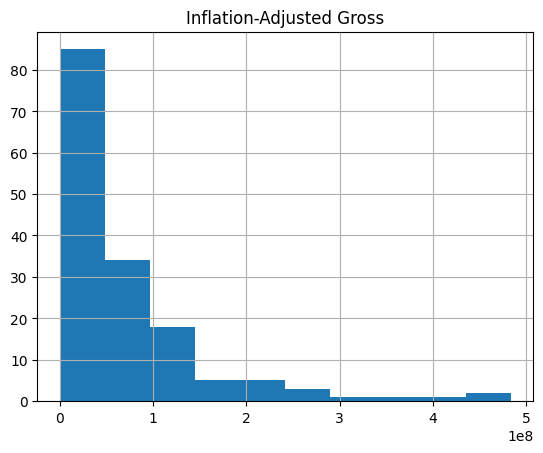

In [ ]:
big_dirs.hist(column = "Inflation-Adjusted Gross")

array([[<Axes: title={'center': 'Inflation-Adjusted Gross'}>]],
      dtype=object)

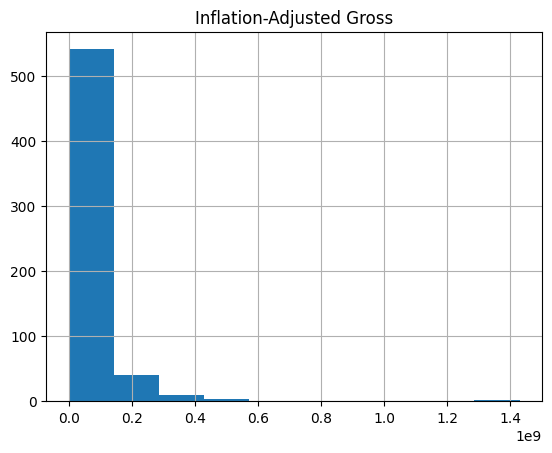

In [ ]:
small_dirs.hist(column = "Inflation-Adjusted Gross")

,Series_Title,Released_Year,Runtime,Genre,Genre2,Genre3,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Year_x,Annual Average CPI(-U)_x,Year_y,Annual Average CPI(-U)_y,Inflation-Adjusted Gross,Famous Director
2,Avatar,2009,162,Action,Adventure,Fantasy,7.8,83,James Cameron,1118998,760507625,1927.0,17.4,2009.0,2.145,3.545490e+08,True
4,Titanic,1997,194,Drama,Romance,NaN,7.8,75,James Cameron,1046089,659325379,1929.0,17.2,1997.0,1.605,4.107946e+08,True
7,The Dark Knight,2008,152,Action,Crime,Drama,9.0,84,Christopher Nolan,2303232,534858444,1932.0,13.6,2008.0,2.153,2.484247e+08,True
9,The Dark Knight Rises,2012,164,Action,Adventure,NaN,8.4,78,Christopher Nolan,1516346,448139099,1934.0,13.4,2012.0,2.296,1.951825e+08,True
10,E.T. the Extra-Terrestrial,1982,115,Family,Sci-Fi,NaN,7.8,91,Steven Spielberg,372490,435110554,1935.0,13.7,1982.0,0.965,4.508918e+08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,GiÃ¹ la testa,1971,157,Drama,War,Western,7.6,77,Sergio Leone,30144,696690,NaN,NaN,1971.0,0.405,1.720222e+06,True
695,Kaze no tani no Naushika,1984,117,Animation,Adventure,Fantasy,8.1,86,Hayao Miyazaki,150924,495770,NaN,NaN,1984.0,1.039,4.771607e+05,True
704,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,Comedy,NaN,NaN,8.4,97,Stanley Kubrick,450474,275902,NaN,NaN,1964.0,0.310,8.900065e+05,True
712,This Is Spinal Tap,1984,82,Comedy,Music,NaN,7.9,92,Rob Reiner,128812,188751,NaN,NaN,1984.0,1.039,1.816660e+05,True


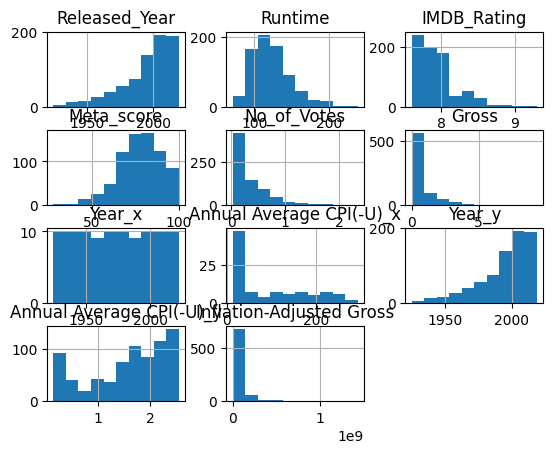

In [ ]:
new_df.hist()
new_df.loc[new_df['Famous Director'] == True]

In [ ]:
action1 = new_df.loc[new_df['Genre']=='Action']
action2 = new_df.loc[new_df['Genre2']==' Action']
action3 = new_df.loc[new_df['Genre3']=='  Action']
action = action1.merge(action2, how='outer')
action = action.merge(action3, how='outer')
action_avg = action['Inflation-Adjusted Gross'].sum()/action['Inflation-Adjusted Gross'].count()
action_avg

86545608.51535834

In [ ]:
animation1 = new_df.loc[new_df['Genre']=='Animation']
animation2 = new_df.loc[new_df['Genre2']==' Animation']
animation3 = new_df.loc[new_df['Genre3']==' Animation']
animation = animation1.merge(animation2, how='outer')
animation = animation.merge(animation3, how='outer')
animation_avg = animation['Inflation-Adjusted Gross'].sum()/animation['Inflation-Adjusted Gross'].count()
animation_avg

81085889.02366066

In [ ]:
fantasy1 = new_df.loc[new_df['Genre']==' Fantasy']
fantasy2 = new_df.loc[new_df['Genre2']==' Fantasy']
fantasy3 = new_df.loc[new_df['Genre3']==' Fantasy']
fantasy = fantasy1.merge(fantasy2, how='outer')
fantasy = fantasy.merge(fantasy3, how='outer')
fantasy_avg = fantasy['Inflation-Adjusted Gross'].sum()/fantasy['Inflation-Adjusted Gross'].count()
fantasy_avg 

87642720.18406218

In [ ]:
drama1 = new_df.loc[new_df['Genre']=='Drama']
drama2 = new_df.loc[new_df['Genre2']==' Drama']
drama3 = new_df.loc[new_df['Genre3']==' Drama']
drama = drama1.merge(drama2, how='outer')
drama = drama.merge(drama3, how='outer')
drama_avg = drama['Inflation-Adjusted Gross'].sum()/drama['Inflation-Adjusted Gross'].count()
drama_avg

41454023.37379831

In [ ]:
scifi1 = new_df.loc[new_df['Genre']=='Sci-Fi']
scifi2 = new_df.loc[new_df['Genre2']==' Sci-Fi']
scifi3 = new_df.loc[new_df['Genre3']==' Sci-Fi']
scifi = scifi1.merge(scifi2, how='outer')
scifi = scifi.merge(scifi3, how='outer')
scifi_avg = scifi['Inflation-Adjusted Gross'].sum()/scifi['Inflation-Adjusted Gross'].count()
scifi_avg

91209423.72814304

In [ ]:
adventure1 = new_df.loc[new_df['Genre']=='Adventure']
adventure2 = new_df.loc[new_df['Genre2']==' Adventure']
adventure3 = new_df.loc[new_df['Genre3']==' Adventure']
adventure = adventure1.merge(adventure2, how='outer')
adventure = adventure.merge(adventure3, how='outer')
adventure_avg = adventure['Inflation-Adjusted Gross'].sum()/adventure['Inflation-Adjusted Gross'].count()
adventure_avg

101978188.14716661

In [ ]:
romance1 = new_df.loc[new_df['Genre']=='Romance']
romance2 = new_df.loc[new_df['Genre2']==' Romance']
romance3 = new_df.loc[new_df['Genre3']==' Romance']
romance = romance1.merge(romance2, how='outer')
romance = romance.merge(romance3, how='outer')
romance_avg = romance['Inflation-Adjusted Gross'].sum()/romance['Inflation-Adjusted Gross'].count()
romance_avg

54390575.122667424

In [ ]:
crime1 = new_df.loc[new_df['Genre']=='Crime']
crime2 = new_df.loc[new_df['Genre2']==' Crime']
crime3 = new_df.loc[new_df['Genre3']==' Crime']
crime = crime1.merge(crime2, how='outer')
crime = crime.merge(crime3, how='outer')
crime_avg = crime['Inflation-Adjusted Gross'].sum()/crime['Inflation-Adjusted Gross'].count()
crime_avg

35928104.37216214

In [ ]:
family1 = new_df.loc[new_df['Genre']=='Family']
family2 = new_df.loc[new_df['Genre2']==' Family']
family3 = new_df.loc[new_df['Genre3']==' Family']
family = family1.merge(family2, how='outer')
family = family.merge(family3, how='outer')
family_avg = family['Inflation-Adjusted Gross'].sum()/family['Inflation-Adjusted Gross'].count()
family_avg

104685122.03759862

In [ ]:
comedy1 = new_df.loc[new_df['Genre']=='Comedy']
comedy2 = new_df.loc[new_df['Genre2']==' Comedy']
comedy3 = new_df.loc[new_df['Genre3']==' Comedy']
comedy = comedy1.merge(comedy2, how='outer')
comedy = comedy.merge(comedy3, how='outer')
comedy_avg = comedy['Inflation-Adjusted Gross'].sum()/comedy['Inflation-Adjusted Gross'].count()
comedy_avg

51919061.63937314

In [ ]:
thriller1 = new_df.loc[new_df['Genre']=='Thriller']
thriller2 = new_df.loc[new_df['Genre2']==' Thriller']
thriller3 = new_df.loc[new_df['Genre3']==' Thriller']
thriller = thriller1.merge(thriller2, how='outer')
thriller = thriller.merge(thriller3, how='outer')
thriller_avg = thriller['Inflation-Adjusted Gross'].sum()/thriller['Inflation-Adjusted Gross'].count()
thriller_avg

<ipython-input-33-fed1bdea7163>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  thriller = thriller1.merge(thriller2, how='outer')
<ipython-input-33-fed1bdea7163>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  thriller = thriller1.merge(thriller2, how='outer')


43273241.12213753

In [ ]:
sport1 = new_df.loc[new_df['Genre']=='Sport']
sport2 = new_df.loc[new_df['Genre2']==' Sport']
sport3 = new_df.loc[new_df['Genre3']==' Sport']
sport = sport1.merge(sport2, how='outer')
sport = sport.merge(sport3, how='outer')
sport_avg = sport['Inflation-Adjusted Gross'].sum()/sport['Inflation-Adjusted Gross'].count()
sport_avg

<ipython-input-34-49d8cc19c1b6>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  sport = sport.merge(sport3, how='outer')


40488388.79644694

In [ ]:
horror1 = new_df.loc[new_df['Genre']=='Horror']
horror2 = new_df.loc[new_df['Genre2']==' Horror']
horror3 = new_df.loc[new_df['Genre3']==' Horror']
horror = horror1.merge(horror2, how='outer')
horror = horror.merge(horror3, how='outer')
horror_avg = horror['Inflation-Adjusted Gross'].sum()/horror['Inflation-Adjusted Gross'].count()
horror_avg

59482589.03616299

In [ ]:
mystery1 = new_df.loc[new_df['Genre']=='Mystery']
mystery2 = new_df.loc[new_df['Genre2']==' Mystery']
mystery3 = new_df.loc[new_df['Genre3']==' Mystery']
mystery = mystery1.merge(mystery2, how='outer')
mystery = mystery.merge(mystery3, how='outer')
mystery_avg = mystery['Inflation-Adjusted Gross'].sum()/mystery['Inflation-Adjusted Gross'].count()
mystery_avg

32508001.152182456

In [ ]:
war1 = new_df.loc[new_df['Genre']=='War']
war2 = new_df.loc[new_df['Genre2']==' War']
war3 = new_df.loc[new_df['Genre3']==' War']
war = war1.merge(war2, how='outer')
war = war.merge(war3, how='outer')
war_avg = war['Inflation-Adjusted Gross'].sum()/war['Inflation-Adjusted Gross'].count()
war_avg

55590480.68205662

In [ ]:
biography1 = new_df.loc[new_df['Genre']=='Biography']
biography2 = new_df.loc[new_df['Genre2']==' Biography']
biography3 = new_df.loc[new_df['Genre3']==' Biography']
biography = biography1.merge(biography2, how='outer')
biography = biography.merge(biography3, how='outer')
biography_avg = biography['Inflation-Adjusted Gross'].sum()/biography['Inflation-Adjusted Gross'].count()
biography_avg

47643661.603784055

In [ ]:
music1 = new_df.loc[new_df['Genre']=='Music']
music2 = new_df.loc[new_df['Genre2']==' Music']
music3 = new_df.loc[new_df['Genre3']==' Music']
music = music1.merge(music2, how='outer')
music = music.merge(music3, how='outer')
music_avg = music['Inflation-Adjusted Gross'].sum()/music['Inflation-Adjusted Gross'].count()
music_avg

25852478.77653182

In [ ]:
history1 = new_df.loc[new_df['Genre']=='History']
history2 = new_df.loc[new_df['Genre2']==' History']
history3 = new_df.loc[new_df['Genre3']==' History']
history = history1.merge(history2, how='outer')
history = history.merge(history3, how='outer')
history_avg = history['Inflation-Adjusted Gross'].sum()/history['Inflation-Adjusted Gross'].count()
history_avg

81596769.76291715

In [ ]:
western1 = new_df.loc[new_df['Genre']=='Western']
western2 = new_df.loc[new_df['Genre2']==' Western']
western3 = new_df.loc[new_df['Genre3']==' Western']
western = western1.merge(western2, how='outer')
western = western.merge(western3, how='outer')
western_avg = western['Inflation-Adjusted Gross'].sum()/western['Inflation-Adjusted Gross'].count()
western_avg

<ipython-input-41-1188b7e05191>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  western = western1.merge(western2, how='outer')
<ipython-input-41-1188b7e05191>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  western = western1.merge(western2, how='outer')
<ipython-input-41-1188b7e05191>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  western = western.merge(western3, how='outer')


58731923.724390104

In [ ]:
musical1 = new_df.loc[new_df['Genre']=='Musical']
musical2 = new_df.loc[new_df['Genre2']==' Musical']
musical3 = new_df.loc[new_df['Genre3']==' Musical']
musical = musical1.merge(musical2, how='outer')
musical = musical.merge(musical3, how='outer')
musical_avg = musical['Inflation-Adjusted Gross'].sum()/musical['Inflation-Adjusted Gross'].count()
musical_avg

61627344.13696572

In [ ]:
film_noir1 = new_df.loc[new_df['Genre']=='Film-Noir']
film_noir2 = new_df.loc[new_df['Genre2']==' Film-Noir']
film_noir3 = new_df.loc[new_df['Genre3']==' Film-Noir']
film_noir = film_noir1.merge(film_noir2, how='outer')
film_noir = film_noir.merge(film_noir3, how='outer')
film_noir_avg = film_noir['Inflation-Adjusted Gross'].sum()/film_noir['Inflation-Adjusted Gross'].count()
film_noir_avg

19648434.51404385

In [ ]:
from google.colab import files
new_df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>